In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from globalVariables import *
from mainModel import simpleModel,simpleModel_TypeA
from testTrainSplit import getTestTrainSets


In [20]:
trainingSet, testSet = getTestTrainSets(split=0.15)

In [21]:
class_names, counts = np.unique(trainingSet['labels'], return_counts=True)

In [22]:
print("There are %i training and %i test sets" % (trainingSet["labels"].shape[0], testSet["labels"].shape[0]))

There are 8500 training and 1500 test sets


In [23]:
model = simpleModel_TypeA(trainingSet["samples"].shape[1:])

In [24]:
csv_file = 'pickles/simpleModel_TypeA_lr_-4.csv'
csv_logger = CSVLogger(csv_file, append=True)
# Train the model with the new callback
inceptionHistory = model.fit(trainingSet['samples'], 
          trainingSet['labels'],  initial_epoch=0,
          epochs=20,
          validation_data=(testSet['samples'], testSet['labels']),\
          callbacks=csv_logger)# Pass callback to training

model.save('pickles/simpleModel_TypeA_lr_-4.h5')

Epoch 1/20
266/266 [==============================] - 104s 387ms/step - loss: 0.5582 - accuracy: 0.8067 - val_loss: 0.3264 - val_accuracy: 0.8880
Epoch 2/20
266/266 [==============================] - 103s 388ms/step - loss: 0.3005 - accuracy: 0.8912 - val_loss: 0.2672 - val_accuracy: 0.9053
Epoch 3/20
266/266 [==============================] - 103s 386ms/step - loss: 0.2571 - accuracy: 0.9045 - val_loss: 0.2425 - val_accuracy: 0.9193
Epoch 4/20
266/266 [==============================] - 103s 385ms/step - loss: 0.2311 - accuracy: 0.9141 - val_loss: 0.2291 - val_accuracy: 0.9280
Epoch 5/20
266/266 [==============================] - 102s 384ms/step - loss: 0.2086 - accuracy: 0.9202 - val_loss: 0.2165 - val_accuracy: 0.9320
Epoch 6/20
266/266 [==============================] - 103s 386ms/step - loss: 0.1904 - accuracy: 0.9286 - val_loss: 0.2087 - val_accuracy: 0.9380
Epoch 7/20
266/266 [==============================] - 102s 385ms/step - loss: 0.1754 - accuracy: 0.9348 - val_loss: 0.2001 -

In [13]:
model.save('pickles/simpleModel_TypeA_lr_-4.h5')

In [26]:
import cv2

In [43]:
model = tf.keras.models.load_model('pickles/simple_1.h5')

In [41]:
blob = cv2.dnn.blobFromImages(np.float32(trainingSet['samples']))

In [52]:
CVmodel = cv2.dnn.readNetFromTensorflow('pickles/simple_1.h5')

In [68]:
CVmodel.getLayerNames()

()

In [53]:
CVmodel.setInput(blob)

In [54]:
output = CVmodel.forward() 

error: OpenCV(4.6.0) /io/opencv/modules/dnn/src/net.cpp:79: error: (-215:Assertion failed) !empty() in function 'forward'


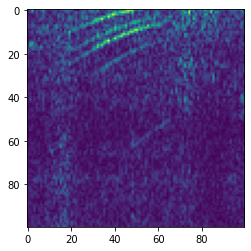

In [59]:
plt.imshow(blob[0,0,:,:])

In [67]:
trainingSet['samples'][0,:,:,0] - blob[0,0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])